In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [3]:
df = pd.read_csv('epa-sea-level.csv')

In [5]:
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


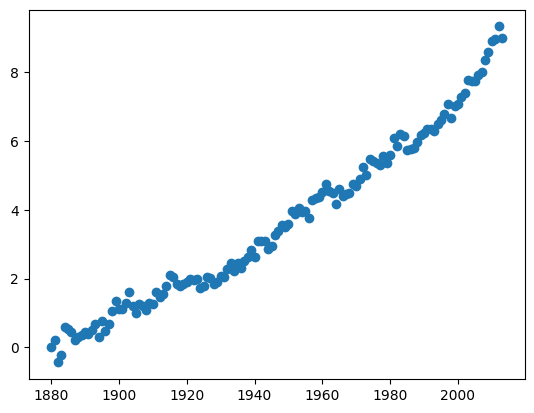

In [7]:
plt.scatter(x=df['Year'], y=df['CSIRO Adjusted Sea Level'])

In [11]:
best_fit_1 = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
best_fit_1

LinregressResult(slope=np.float64(0.06304458401213482), intercept=np.float64(-119.06594196773983), rvalue=np.float64(0.984757131182585), pvalue=np.float64(3.788696979113155e-102), stderr=np.float64(0.0009692118713287152), intercept_stderr=np.float64(1.886943381242523))

In [13]:
df['pred1'] = best_fit_1.slope * df['Year'] + best_fit_1.intercept

In [28]:
df_pred = pd.DataFrame({'Year':list(range(1880, 2051, 1))})
df_pred['pred_sea_level'] = best_fit_1.slope * df_pred['Year'] + best_fit_1.intercept
df_pred

,Year,pred_sea_level
0,1880,-0.542124
1,1881,-0.479079
2,1882,-0.416035
3,1883,-0.352990
4,1884,-0.289946
...,...,...
166,2046,9.923277
167,2047,9.986322
168,2048,10.049366
169,2049,10.112411


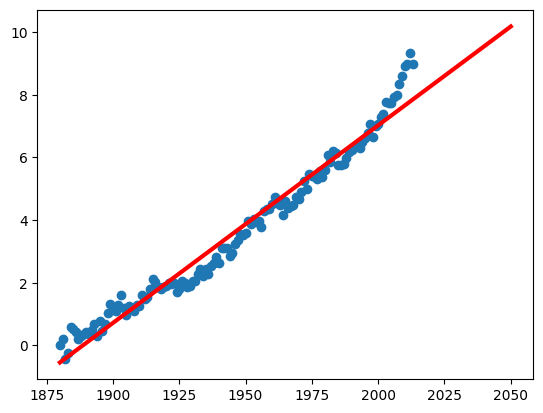

In [29]:
plt.scatter(x=df['Year'], y=df['CSIRO Adjusted Sea Level'])
plt.plot(df_pred['Year'], df_pred['pred_sea_level'], color = 'red', linewidth = 3)

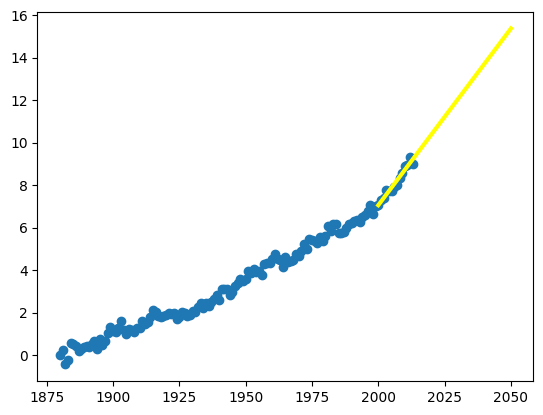

In [33]:
plt.scatter(x=df['Year'], y=df['CSIRO Adjusted Sea Level'])
best_fit_2 = linregress(df[df['Year'] > 1999]['Year'], df[df['Year'] > 1999]['CSIRO Adjusted Sea Level'])
df_pred2 = pd.DataFrame({'Year':list(range(2000, 2051, 1))})
df_pred2['pred_sea_level'] = best_fit_2.slope * df_pred2['Year'] + best_fit_2.intercept
plt.plot(df_pred2['Year'], df_pred2['pred_sea_level'], color = 'yellow', linewidth = 3)